# The setup

A lot of times when you're using pandas you're also going to use matplotlib, and when you're using matplotlib you're also going to be making inline graphics. So why not do it all at once?

In [1]:
# Let's do all of our setup
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# The import

Always name your initial dataframe `df`. Always always always. Why? Because everyone else does, and because 

* when you slice it and dice it into different pieces (only really rich people, only cats, only flights to Finland, etc)
* you can give each of those names, while knowing `df` is your original dataframe.

In [5]:
df = pd.read_excel("rich_people.xlsx")

# The examining

Your best friends for a quick peek are are 

* `df.head()` to see the first ten
* `df.columns` to see the column names
* `df.info()` to see more detailed info about each column
* `df.describe()` to see summary statistics about each numeric column

Once you do these few steps, you should be able to draw up a list of ten or so questions to ask your data.

In [6]:
df.head(2)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [7]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

# Slicing your data

I made a *terrible mistake* on Monday about how I taught sub-selects (the things that are basically SQL `WHERE` statements), and it's all because of how I named my variables.

We're going to take a sample of the data to work with so it looks a little cleaner - only take a few columns of the first 8. It's a complicated line, don't sweat it. Just think about the result for now.

In [20]:
sample = df[df['year'] == 2014][['name', 'countrycode', 'selfmade', 'rank', 'networthusbillion']].sort_values(by='rank').head(8)
sample

,name,countrycode,selfmade,rank,networthusbillion
284,Bill Gates,USA,self-made,1,76.0
348,Carlos Slim Helu,MEX,self-made,2,72.0
124,Amancio Ortega,ESP,self-made,3,64.0
2491,Warren Buffett,USA,self-made,4,58.2
1377,Larry Ellison,USA,self-made,5,48.0
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0
2185,Sheldon Adelson,USA,self-made,8,38.0


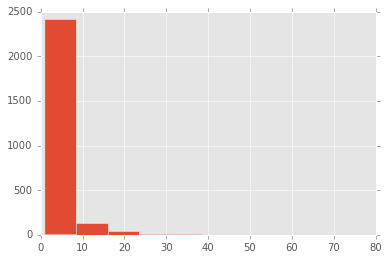

In [10]:
plt.style.use('ggplot')
df['networthusbillion'].hist()

Who is from the USA? There **two different things we can do**. This was a big point of confusion in class

1. We can **list whether someone is from the USA or not.**
2. Or, we can use that list to **select only the people from the USA.**

Let's look at them both, then see how they're used.

In [26]:
sample['countrycode'] == 'USA'

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

This just gave us a list of `True` and `False` values.

* First person? Definitely from the USA.
* Next row? Not from the USA.
* Third person? Not from the USA.
* Fourth? Yes, they're from the USA.

On the other hand, we can also use similar syntax to get a list of every person from the USA.

In [27]:
sample[sample['countrycode'] == 'USA']

,name,countrycode,selfmade,rank,networthusbillion
284,Bill Gates,USA,self-made,1,76.0
2491,Warren Buffett,USA,self-made,4,58.2
1377,Larry Ellison,USA,self-made,5,48.0
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0
2185,Sheldon Adelson,USA,self-made,8,38.0


That one was a two-step process,

1. we got a list of `True`/`False` values (are they from the USA?), then
2. **fed that `True`/`False` list back into the dataframe.**

For every row that's `True`, it let us keep the row. If it was `False`, it doesn't let us keep the row.

## When to use what

Let's say we wanted to select every single row that is from USA, has inherited wealth, and is in the top 10 wealthiest people in the world. If we wanted to do it all on one line, we could!

In [32]:
sample[(sample['countrycode'] == 'USA') & (sample['selfmade'] == 'inherited') & (sample['rank'] < 10)]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


That looks *super confusing*. In it we have three separate things we're testing for (a.k.a. getting True/False back)

* `sample['countrycode'] == 'USA'`
* `sample['selfmade'] == 'inherited'`
* `sample['rank'] < 10`

And we're jamming them all into `sample[blah blah]` to get back a dataframe for which all of those are true. It works, but it's ugly.

Again, let's remind ourselves what a piece like that looks like, it's **just a list of True and False values**

In [33]:
sample['countrycode'] == 'USA'

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

If we felt like the code we had before was a little too complicated, we could break it down into manageable, well-named pieces like this:

In [35]:
is_american = sample['countrycode'] == 'USA'
is_inherited = sample['selfmade'] == 'inherited'
is_top_ten = sample['rank'] < 10

sample[is_american & is_inherited & is_top_ten]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


Let's look at each individual piece.

`is_american`, which is the same thing as `sample['countrycode'] == 'USA'`, is **not** a list of people. It is **not** a dataframe. It is a **list of true and false values**.

In [37]:
is_american

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

It's the same thing with `is_inherited` and `is_top_ten`. It's just a shortcut for me, so I don't have to type out `sample['selfmade'] == 'inherited'`. We can combine them all using `&` to get a list of `True`/`False` values in which every one of those conditions is true

In [38]:
is_american & is_inherited & is_top_ten

284     False
348     False
124     False
2491    False
1377    False
509      True
381      True
2185    False
dtype: bool

Which we can then feed into the dataframe

In [40]:
sample[is_american & is_inherited & is_top_ten]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


So what I'm saying is, these two things are the same:

### Method One: Breaking into separate readable things

In [46]:
is_american = sample['countrycode'] == 'USA'
is_inherited = sample['selfmade'] == 'inherited'
is_top_ten = sample['rank'] < 10

kochs = sample[is_american & is_inherited & is_top_ten]
kochs

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


### Method Two: Doing it all at once

In [47]:
kochs = sample[(sample['countrycode'] == 'USA') & (sample['selfmade'] == 'inherited') & (sample['rank'] < 10)]
kochs

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


### Make sure you know the difference between these two

* `df['countrycode'] == 'USA'`
* `df[df['countrycode'] == 'USA']`

# Joining data

Now, let's say we wanted to join a bunch of data together. We have a lot of countries here, right? And we'd like to know how much of their wealth is concentrated in these rich people.

In [49]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN


## What do we combine it with?

I'm going to get my GDP data from [this web site](http://statisticstimes.com/economy/world-gdp-ranking.php), because... I googled GDP 2014 and it came up.

We could manually say okay, so A. Jerrold Perenchio	has 2.6 billion dollars, and USA's GDP was 17.418 trillion (17418 billion), so he's at about 0.015% of the GDP. **But we are lazy, so we want the computer to do it.** In order to do that, though, we need to **merge that information into our existing dataset.**

I'm also too lazy to look up the GDP for every country, so I'm just going to pick the top ten.

In [52]:
df['countrycode'].value_counts().head(10)

USA    903
DEU    160
CHN    153
RUS    119
JPN     96
BRA     81
HKG     77
FRA     72
GBR     65
IND     63
Name: countrycode, dtype: int64

I'm also too lazy to find a csv that has the data I need, so **I'm going to make a dataframe out of a dictionary**. It's pretty easy.

In [54]:
# Make a list of dictionaries
country_gdp = [
    { 'country': 'USA', 'gdp': 17.418 },
    { 'country': 'DEU', 'gdp': 3.859 },
    { 'country': 'CHN', 'gdp': 10.380 },
    { 'country': 'RUS', 'gdp': 1.857 },
    { 'country': 'JPN', 'gdp': 4.616 },
    { 'country': 'BRA', 'gdp': 2.353 },
    { 'country': 'HKG', 'gdp': 0.289 },
    { 'country': 'FRA', 'gdp': 2.846 },
    { 'country': 'GBR', 'gdp': 2.945 },
    { 'country': 'IND', 'gdp': 2.049 }
]

# Convert it into a DataFrame
gdp_df = pd.DataFrame(country_gdp)
gdp_df

,country,gdp
0,USA,17.418
1,DEU,3.859
2,CHN,10.380
3,RUS,1.857
4,JPN,4.616
5,BRA,2.353
6,HKG,0.289
7,FRA,2.846
8,GBR,2.945
9,IND,2.049


I could have read it in from a csv, but since I didn't have a csv I might as well just type it out. I also want it in *billions*, not in *trillions*, so let's add a column real quick

In [55]:
gdp_df['gdp_billions'] = gdp_df['gdp'] * 1000
gdp_df

,country,gdp,gdp_billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0
5,BRA,2.353,2353.0
6,HKG,0.289,289.0
7,FRA,2.846,2846.0
8,GBR,2.945,2945.0
9,IND,2.049,2049.0


### STEP ONE: Finding a join key

My favorite resource for joining data with `pandas` is [this page](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join). It compares everything to SQL JOINs, which *I* understand. You could also check out [this page](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) which I find kind of confusing.

So what we need to do is **match up a column between our two dataframes.**

In [58]:
df.head(1)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [59]:
gdp_df.head(1)

,country,gdp,gdp_billions
0,USA,17.418,17418.0


It looks like we're going to be matching up **`countrycode`** from `df` with **`country`** from `gdp_df`.

### STEP TWO: Doing the merge

You merge using **`.merge`**, and then give two parameters: 

* **`left_on`**, the first dataframe's column name to merge on
* **`right_on`**, the second dataframe's column name to merge on

In [61]:
# Since we're only working with 2014's GDP, let's make a variable
# that's only 2014 scores
recent = df[df['year'] == 2014]
recent.head(1)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [64]:
# Let's do the merge
people_with_gdp = recent.merge(gdp_df, left_on='countrycode', right_on='country')

# Look at the top 10
people_with_gdp.sort_values(by='rank').head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,country,gdp,gdp_billions
33,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN,USA,17.418,17418.0
484,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN,USA,17.418,17418.0
280,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN,USA,17.418,17418.0
57,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN,USA,17.418,17418.0
93,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN,USA,17.418,17418.0


Hmmm see how rank skips through 1, 4, 5, 6, 6? This is because **we only kept rows we have matches for**. The second wealthiest person is from Mexico, but since we didn't have GDP from Mexico it left. You can see if we just do a simple `.count()`

In [67]:
len(recent)

1653

In [68]:
len(people_with_gdp)

1130

We lost like 500 people! Maybe even if we don't have the GDP of their country we want to keep them?

### Types of joins

Let's just look at our data real quick before I explain the two major types of joins.

In [91]:
# How many rows in our 2014 dataframe?
print("We start with", len(recent))
recent[['rank','name', 'countrycode']].sort_values(by='rank').head(3)

We start with 1653


,rank,name,countrycode
284,1,Bill Gates,USA
348,2,Carlos Slim Helu,MEX
124,3,Amancio Ortega,ESP


### Inner joins

The default kind of join is an **inner** join. It requires you to have a match on the left hand side AND the right hand side.

**If you're in the original dataframe and you don't have a match in the joining dataframe, you disappear.** Watch how Carlos "Slim" Helu and Amancio Ortega both disappear. 

In [92]:
# Inner join must have a match in both tables
inner_join_df = recent.merge(gdp_df, left_on='countrycode', right_on='country')
print("We now have", len(inner_join_df))
inner_join_df[['rank','name', 'countrycode', 'gdp_billions']].sort_values(by='rank').head(3)

We now have 1130


,rank,name,countrycode,gdp_billions
33,1,Bill Gates,USA,17418.0
484,4,Warren Buffett,USA,17418.0
280,5,Larry Ellison,USA,17418.0


### Left join

The other major kind of join is a **left join**. The "left" dataframe (the one you type first), gets to keep its rows, even if there aren't any matches in the joining dataframe.

In [93]:
# Do a left join, we keep everyone even if they don't have a match in the gdp table
left_join_df = recent.merge(gdp_df, left_on='countrycode', right_on='country', how='left')
print("We now have", len(left_join_df))
left_join_df[['rank', 'name','countrycode', 'gdp_billions']].sort_values(by='rank').head(3)

We now have 1653


,rank,name,countrycode,gdp_billions
184,1,Bill Gates,USA,17418.0
226,2,Carlos Slim Helu,MEX,NaN
79,3,Amancio Ortega,ESP,NaN


### A pretty join picture

Did you see this image already? Well, now you have.

![](http://i.imgur.com/7Ssc4l.jpg)

# Functions

We should have a whole class dedicated to functions, but just in case I'm going to put it down in here!

**A function is a reuseable chunk of code**. You know how we write `len` whenever we want the length of a list? We can make our own things like that!

## A simple function

Let's say my job is to take two numbers, add them together, and multiply by two.

In [1]:
# 3 and 4
print((3 + 4) * 2)

# 4 and 6
print((4 + 6) * 2)

# 100 and 40
print((100 + 40) * 2)

14
20
280


I'm clearly prettty good at my job, but I get tired of writing the same thing over and over again, and **what if I accidentally make a typo?** It would be a lot easier if there was a function like `len` that, instead of giving me the length of a list, could take two numbers and print out the answer.

So, let's make that.

In [2]:
def calc(a, b):
    added = a + b
    return added * 2;

print(calc(3, 4))
print(calc(4, 6))
print(calc(100, 40))

14
20
280


I can even use it down here, save it to a variable, whatever

In [3]:
result = calc(10, 400)
print("The calculated result is", result)

The calculated result is 820


## Parts of a function

Our function looks like this:

````py
def calc(a, b):
    added = a + b
    return added * 2;
````

It's a function called `calc` that takes two parameters - we call them `a` and `b` - and then sends back a calculated result.

* **`def`** means "I'm going to define a function now
* **`calc`** is the function's name
* **`(a, b)`** are the parameters it takes - when I use `calc`, what can I send it?
* **`return`** lets the function know that I'm finished and ready to send something back.